In [5]:
import pandas as pd
import numpy as np
import pyproj
import folium
import matplotlib.pyplot as plt

### 버스정류장

In [9]:
bus = pd.read_excel("서울시 버스정류소 좌표데이터(2023.03.10).xlsx")
bus[bus["정류소명"]=="광진구청"]

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
1662,104000055,5148,광진구청,127.083519,37.538986
1687,104000082,5175,광진구청,127.083153,37.538488


In [7]:
bus[bus["정류소명"]=="광진경찰서"]

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
1659,104000052,5145,광진경찰서,127.083688,37.541534
1660,104000053,5146,광진경찰서,127.084647,37.543087
1661,104000054,5147,광진경찰서,127.084359,37.542211
1838,104900090,5573,광진경찰서,127.083714,37.541594


In [25]:
bus[bus["정류소명"]=="자양종합복지관앞"]

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
1901,104900071,5733,자양종합복지관앞,127.075324,37.53245


광진구의 버스정류장은 NODE_ID가 104~

In [10]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12559 entries, 0 to 12558
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NODE_ID  12559 non-null  int64  
 1   ARS_ID   12559 non-null  int64  
 2   정류소명     12559 non-null  object 
 3   X좌표      12559 non-null  float64
 4   Y좌표      12559 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 490.7+ KB


In [11]:
bus = bus[(bus["NODE_ID"]>=104000000)&(bus["NODE_ID"]<105000000)]

In [12]:
bus.head()

,NODE_ID,ARS_ID,정류소명,X좌표,Y좌표
1302,104900130,4506,송정동자치회관,127.068707,37.550739
1316,104900131,4518,성수SKV1센터1동,127.065789,37.545842
1604,104000001,5001,군자교입구,127.075646,37.558741
1605,104000002,5002,군자교입구,127.074900,37.558794
1606,104000003,5003,군자역.용마초등학교,127.082473,37.556099


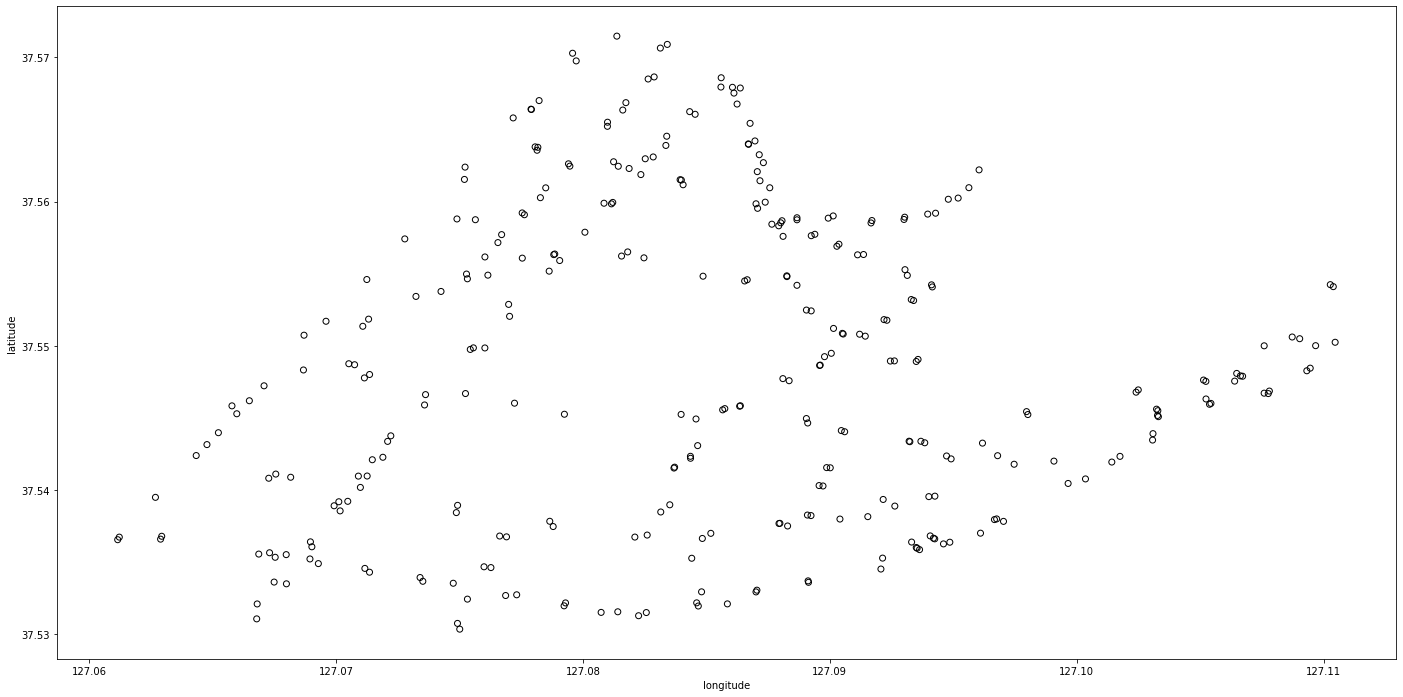

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)

ax.scatter(bus.X좌표, bus.Y좌표, color="black",facecolor="none")


plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

### 병원

In [14]:
hospital = pd.read_csv("서울시 병의원 위치 정보.csv", header=0, encoding="cp949")

In [15]:
hospital.head()

,기관ID,주소,병원분류,병원분류명,응급의료기관코드,응급의료기관코드명,응급실운영여부(1/2),비고,기관설명상세,간이약도,...,진료시간(목요일)S,진료시간(금요일)S,진료시간(토요일)S,진료시간(일요일)S,진료시간(공휴일)S,우편번호1,우편번호2,병원경도,병원위도,작업시간
0,A1120837,"서울특별시 금천구 벚꽃로 286, 삼성리더스타워 111~114호 (가산동)",C,의원,G099,응급의료기관 이외,2,"외과: 상시진료, 내과는 당분간 휴진","서울시 송파구 문정동 장지동 법조단지 위례 가락동 가락시장역 위치, 삼성서울병원 외...",방이역 1번출구 바로옆 굿모닝 신한증권 뒷건물,...,900,900,900,1000.0,1000.0,85,11,126.884122,37.480394,2022-04-07 14:55:00.0
1,A1104130,"서울특별시 강남구 도산대로 118 (논현동, 신사빌딩 2층)",C,의원,G099,응급의료기관 이외,2,비만클리닉,"365일 진료, 국민건강보험공단 검진 지정병원 점심시간 13~14시",신사역 1번 출구 인근,...,1100,1100,1100,900.0,900.0,60,38,127.021809,37.516604,2021-06-07 14:54:49.0
2,B1100027,서울특별시 강남구 봉은사로 612 (삼성동),E,한방병원,G099,응급의료기관 이외,2,진료과목마다 진료시간 다릅니다. 전화 확인 후 방문해주세요.,NaN,봉은사역 5번 출구 삼성1동주민센터 옆,...,900,900,900,NaN,NaN,61,70,127.062148,37.514280,2023-03-07 14:55:24.0
3,A1117873,"서울특별시 관악구 신원로 38, 5층 (신림동, 청암빌딩)",N,치과의원,G099,응급의료기관 이외,2,대표번호1 지역번호 추가20170118150453,"서울시 송파구 문정동 장지동 법조단지 위례 가락동 가락시장역 위치, 삼성서울병원 외...",서월치안센터 인근 청암빌딩 5층,...,1400,1000,1000,1000.0,1000.0,87,76,126.929377,37.481918,2022-01-07 14:54:55.0
4,A1106364,"서울특별시 강남구 테헤란로 509, 지하2층,지하1층일부,2층 (삼성동)",C,의원,G099,응급의료기관 이외,2,일요일 공휴일의 경우 진료가능여부 전화확인 후 방문 필요,차움건진센터 삼성분원,삼성역 5번출구 인근/하나은행 강남외환센터 건물 옆 NC타워,...,730,730,730,900.0,900.0,61,69,127.058206,37.507780,2023-03-07 14:55:24.0


In [17]:
hospital = hospital[hospital['주소'].str.contains('광진구')]

In [39]:
hospital.columns

Index(['기관ID', '주소', '병원분류', '병원분류명', '응급의료기관코드', '응급의료기관코드명', '응급실운영여부(1/2)',
       '비고', '기관설명상세', '간이약도', '기관명', '대표전화1', '응급실전화', '진료시간(월요일)C',
       '진료시간(화요일)C', '진료시간(수요일)C', '진료시간(목요일)C', '진료시간(금요일)C', '진료시간(토요일)C',
       '진료시간(일요일)C', '진료시간(공휴일)C', '진료시간(월요일)S', '진료시간(화요일)S', '진료시간(수요일)S',
       '진료시간(목요일)S', '진료시간(금요일)S', '진료시간(토요일)S', '진료시간(일요일)S', '진료시간(공휴일)S',
       '우편번호1', '우편번호2', '병원경도', '병원위도', '작업시간'],
      dtype='object')

In [55]:
hospital.head()

,기관ID,주소,병원분류,병원분류명,응급의료기관코드,응급의료기관코드명,응급실운영여부(1/2),비고,기관설명상세,간이약도,...,진료시간(목요일)S,진료시간(금요일)S,진료시간(토요일)S,진료시간(일요일)S,진료시간(공휴일)S,우편번호1,우편번호2,병원경도,병원위도,작업시간
56,A1102203,"서울특별시 광진구 광나루로 608, (구의동)",C,의원,G099,응급의료기관 이외,2,이물제거/후두내시경,"보건복지부 지정 추나요법 시범사업기관입니다. 침, 한약, 추나, 면역약침등의 한의학...",대방역 보라매역 사이 병무청 근처,...,930,930,930,1100.0,1100.0,50,34,127.095283,37.541186,2020-12-07 14:53:13.0
58,B1106156,"서울특별시 광진구 능동로 302, 3층 (능동)",G,한의원,G099,응급의료기관 이외,2,"점심시간 13:00~14:30 목요일 휴무, 공휴일 또는 임시휴진시 대체진료","토요일(2,4주 휴진)/",홍제역 4번출구,...,900,900,900,900.0,900.0,49,85,127.079544,37.556594,2023-03-07 14:55:24.0
74,A1117969,"서울특별시 광진구 광나루로 614, 4층 (구의동, 만택빌딩)",C,의원,G099,응급의료기관 이외,2,점심시간 13:00~14:00,국가구강검진 등록기관,올림픽대교북단 사거리,...,900,900,900,900.0,900.0,51,17,127.095835,37.540790,2023-03-07 14:55:26.0
95,B1105904,서울특별시 광진구 아차산로36길 35 자양우성7차아파트 상가동 303호 (자양동),G,한의원,G099,응급의료기관 이외,2,임직원 대상 진료,"외래 30분전 접수마감/토요일은 일부과만 진료하며, 진료과 사정상 토요진료가 어려울...",건대입구역 5번출구 길 건너 인근,...,1000,1000,1000,0.0,930.0,50,66,127.074101,37.537080,2022-04-07 14:55:03.0
326,A1105866,"서울특별시 광진구 광나루로56길 63, 프라임프라자 501~503호 (구의동)",C,의원,G099,응급의료기관 이외,2,접수는 진료 마감 1시간전까지,상처소독／간단한 외상처치／,강변역 1번출구 우리은행 인근(광진문화원 옆건물)/프라임프라자 5층,...,900,900,900,900.0,900.0,51,19,127.096205,37.536734,2023-03-07 14:55:24.0


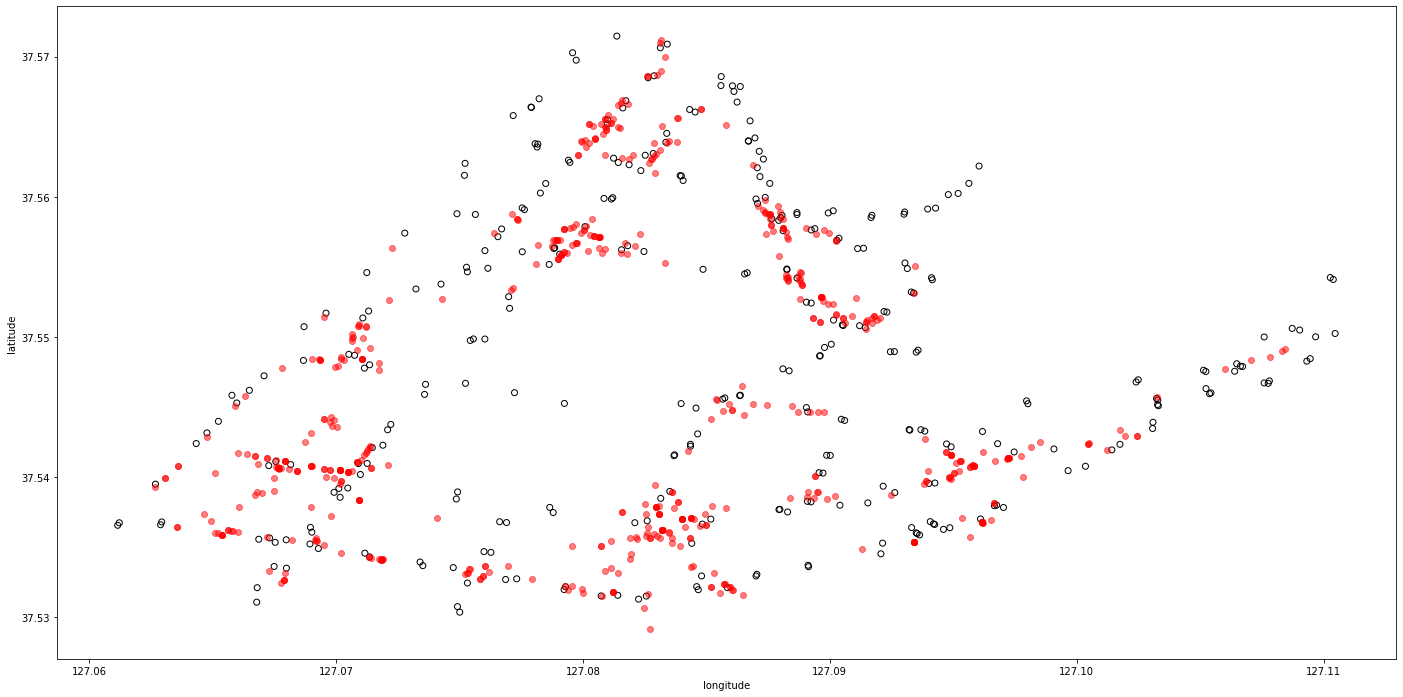

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)

ax.scatter(bus.X좌표, bus.Y좌표, color="black",facecolor="none")
ax.scatter(hospital.병원경도, hospital.병원위도, color="red", alpha=0.5)


plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

### 경로당

In [20]:
center = pd.read_csv("서울시 경로당 정보.csv", encoding="cp949")

In [96]:
center

,번호,사업장명,소재지전체주소,도로명전체주소,인허가일자,영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지면적,소재지우편번호,입소정원,자격소유인원수,총인원수,위치정보(X),위치정보(Y),인허가번호,상세영업상태명
0,3745,정릉꿈에그린(아)경로당,서울특별시 성북구 정릉동 정릉꿈에그린,NaN,20170808,운영중,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3070000201800004,운영
1,3744,구파발10단 제3경로당,서울특별시 은평구 진관동 은평뉴타운구파발,NaN,20121212,운영중,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,3110000201800003,운영
2,3743,아현 아이파크 경로당,서울특별시 마포구 아현동 104동,NaN,20180406,운영중,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN,NaN,3130000201800004,운영
3,3742,상암월드컵파크12단지(아)경로당,서울특별시 마포구 상암동 상암월드컵파크12단지,NaN,20110414,운영중,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3130000201800014,운영
4,3741,상암월드컵파크11단지 경로당,서울특별시 마포구 상암동 상암월드컵파크11단지,NaN,20121024,운영중,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,3130000201800013,운영
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,5,마곡엠밸리6단지경로당,서울특별시 강서구 마곡동,NaN,20160801,운영중,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,3150000201600015,운영
3741,4,큰덕경로당,서울특별시 마포구 공덕동,NaN,20111014,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3130000201600006,운영
3742,3,구립양평3가경로당,서울특별시 영등포구 양평동3가 36번지,NaN,19890706,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,189979.778775,447187.580725,3180000201500006,운영
3743,2,백련산힐스테이트1차아파트경로당,서울특별시 은평구 응암동,NaN,20131121,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,3110000201500015,운영


In [21]:
center = center[center['소재지전체주소'].str.contains('광진구')]

In [22]:
center["위치정보(X)"]

2253    208436.929247
2254    208157.575713
2255    206930.999805
2256    207720.770707
2257              NaN
            ...      
2378    207604.827625
2379              NaN
2380    205945.988201
2381    209194.595129
2382    206349.675048
Name: 위치정보(X), Length: 96, dtype: float64

#### 좌표계 변환

In [2]:
#!pip install pyproj
#!pip install folium

You should consider upgrading via the 'C:\Users\hi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 5.1/5.1 MB 10.5 MB/s eta 0:00:00


In [23]:
center1 = center[["위치정보(X)", "위치정보(Y)"]]

In [24]:
center1['좌표정보(x)'] = pd.to_numeric(center1['위치정보(X)'], errors="coerce")
center1['좌표정보(y)'] = pd.to_numeric(center1['위치정보(Y)'], errors="coerce")

C:\Users\hi\AppData\Local\Temp\ipykernel_6192\2176726675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center1['좌표정보(x)'] = pd.to_numeric(center1['위치정보(X)'], errors="coerce")
C:\Users\hi\AppData\Local\Temp\ipykernel_6192\2176726675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center1['좌표정보(y)'] = pd.to_numeric(center1['위치정보(Y)'], errors="coerce")


In [25]:
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [26]:
coord = np.array(center1)
coord

array([[208436.929247, 449774.000548, 208436.929247, 449774.000548],
       [208157.575713, 450796.592729, 208157.575713, 450796.592729],
       [206930.999805, 451377.990578, 206930.999805, 451377.990578],
       [207720.770707, 447814.95463 , 207720.770707, 447814.95463 ],
       [          nan,           nan,           nan,           nan],
       [208644.81921 , 448711.72575 , 208644.81921 , 448711.72575 ],
       [206262.764475, 448198.331515, 206262.764475, 448198.331515],
       [208776.911786, 448611.307016, 208776.911786, 448611.307016],
       [209112.319775, 449300.732772, 209112.319775, 449300.732772],
       [207973.806782, 447692.55525 , 207973.806782, 447692.55525 ],
       [206976.323025, 448468.55187 , 206976.323025, 448468.55187 ],
       [206469.619425, 447893.712053, 206469.619425, 447893.712053],
       [207959.918374, 447868.230617, 207959.918374, 447868.230617],
       [205571.400398, 448499.425849, 205571.400398, 448499.425849],
       [206143.06468 , 450071.7034

In [27]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\hi\AppData\Local\Temp\ipykernel_6192\2093212355.py:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#up

array([[127.0933741 ,  37.55019374],
       [127.09022409,  37.55940968],
       [127.07634735,  37.56465796],
       [127.08524932,  37.53254913],
       [         nan,          nan],
       [127.09571426,  37.54062084],
       [127.068757  ,  37.53601428],
       [127.0972077 ,  37.53971484],
       [127.10101128,  37.54592327],
       [127.08811079,  37.53144419],
       [127.07683296,  37.53844387],
       [127.07109476,  37.53326827],
       [127.08795555,  37.53302713],
       [127.06093696,  37.5387315 ],
       [127.06741819,  37.55289399],
       [127.07149316,  37.53200754],
       [         nan,          nan],
       [127.07480133,  37.53577871],
       [127.10598124,  37.54965768],
       [127.10129862,  37.54315871],
       [127.0864955 ,  37.54450288],
       [127.07629238,  37.5536304 ],
       [127.08168231,  37.56828679],
       [127.08088338,  37.55923878],
       [127.08064337,  37.54393891],
       [127.08878429,  37.55763962],
       [         nan,          nan],
 

In [28]:
center["위치정보(X)"] = result[:,0]
center["위치정보(Y)"] = result[:,1]

In [29]:
center["위치정보(X)"]

2253    127.093374
2254    127.090224
2255    127.076347
2256    127.085249
2257           NaN
           ...    
2378    127.083970
2379           NaN
2380    127.065170
2381    127.101944
2382    127.069742
Name: 위치정보(X), Length: 96, dtype: float64

In [30]:
center["위치정보(X)"].isna().sum()

5

그냥 직접 채우죠

In [31]:
center[center["위치정보(X)"].isna()]

,번호,사업장명,소재지전체주소,도로명전체주소,인허가일자,영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지면적,소재지우편번호,입소정원,자격소유인원수,총인원수,위치정보(X),위치정보(Y),인허가번호,상세영업상태명
2257,1488,국가유공자경로당,서울특별시 광진구 구의동 587-40번지,NaN,19920715,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3040000199200002,운영
2269,1476,신양경로당,서울특별시 광진구 자양동 514-39번지,NaN,19890615,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3040000198900009,운영
2279,1466,중곡3동경로당,서울특별시 광진구 중곡동 503-328번지,NaN,19980815,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3040000199800005,운영
2317,1428,현대2단지아파트경로당,서울특별시 광진구 구의동 548-611번지,NaN,19940715,운영중,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3040000199400008,운영
2379,1366,우성1차아파트경로당,서울특별시 광진구 자양동 579-8번지,NaN,19890601,운영중,NaN,NaN,NaN,NaN,NaN,NaN,61.0,0.0,0.0,NaN,NaN,3040000200900009,운영


In [32]:
#국가유공자경로당
center["위치정보(X)"].loc[2257]= 127.091916
center["위치정보(Y)"].loc[2257]= 37.538067

#신양경로당
center["위치정보(X)"].loc[2269]= 127.071158
center["위치정보(Y)"].loc[2269]= 37.535380

#중곡3동경로당 - 데이터에 있는 주소로는 안나와서 네이버지도 주소로 함..
center["위치정보(X)"].loc[2279]= 127.081
center["위치정보(Y)"].loc[2279]= 37.5701

#현대2단지아파트경로당 - 네이버지도에도 안나오는데 걍 현대2단지아파트로 함
center["위치정보(X)"].loc[2317]= 127.0963
center["위치정보(Y)"].loc[2317]= 37.5387

#우성1차아파트경로당
center["위치정보(X)"].loc[2379]= 127.0756
center["위치정보(Y)"].loc[2379]= 37.5344

C:\Users\hi\AppData\Local\Temp\ipykernel_6192\3372193394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center["위치정보(X)"].loc[2257]= 127.091916
C:\Users\hi\AppData\Local\Temp\ipykernel_6192\3372193394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center["위치정보(Y)"].loc[2257]= 37.538067
C:\Users\hi\AppData\Local\Temp\ipykernel_6192\3372193394.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  center["위치정보(X)"].loc[2269]= 127.

In [33]:
center["위치정보(X)"].isna().sum()
center["위치정보(Y)"].isna().sum()

0

In [34]:
center = center.rename(columns={"위치정보(X)":"X좌표", "위치정보(Y)":"Y좌표"})

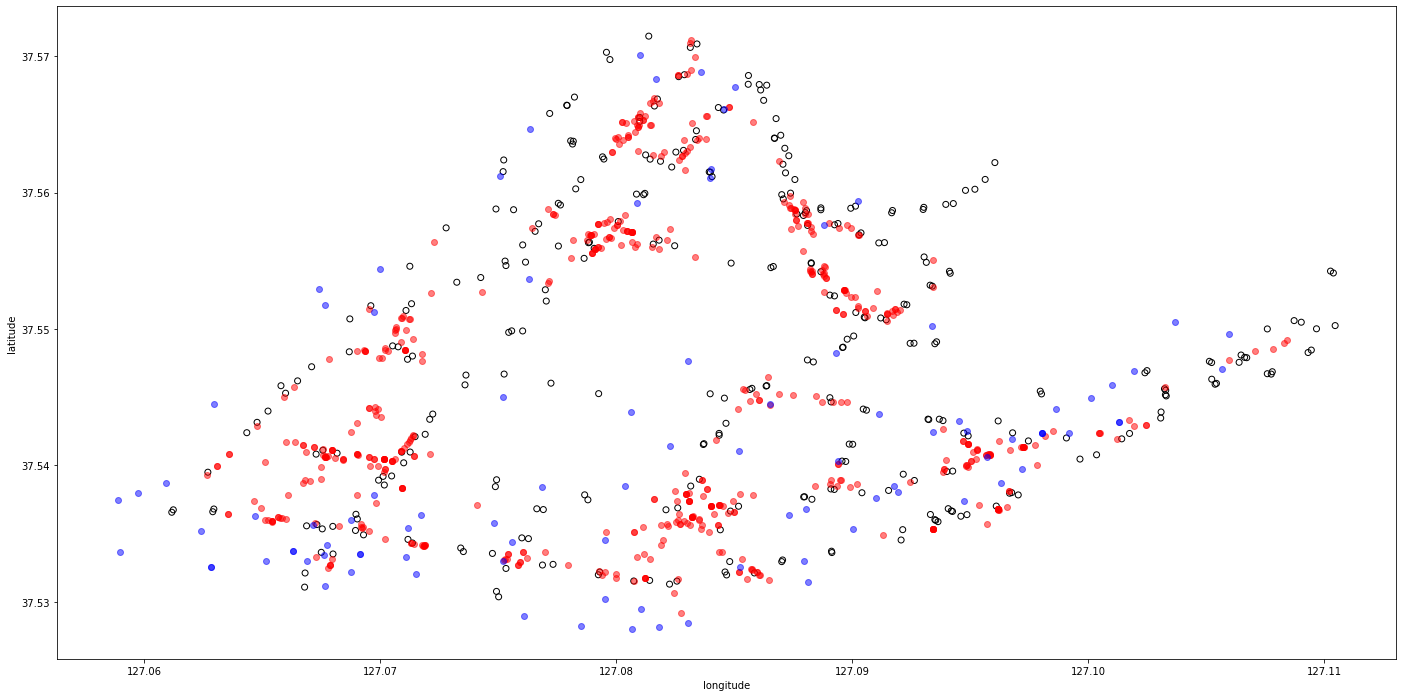

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)

ax.scatter(bus.X좌표, bus.Y좌표, color="black",facecolor="none")
ax.scatter(hospital.병원경도, hospital.병원위도, color="red", alpha=0.5)
ax.scatter(center.X좌표, center.Y좌표, color="blue", alpha=0.5)


plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

### 시장

In [37]:
market = pd.read_csv('C:\\nonsaso004\\gjg\\market.csv', encoding='cp949')
market.head(2)

,자치구 코드,자치구명,전통시장명,주소명,위도,경도
0,22,은평구,갈현시장,갈현동 424-16,37.623587,126.917385
1,12,동작구,강남시장,상도동 488,37.518749,127.020640


In [38]:
market = market[market['자치구명'].str.contains('광진구')]
market

,자치구 코드,자치구명,전통시장명,주소명,위도,경도
25,6,광진구,광성시장,광진구 중곡동 229-15,37.563576,127.081113
30,6,광진구,구의시장,광진구 구의동 66-25,37.545644,127.088505
50,6,광진구,노룬산골목시장,자양동 44-12,37.536607,127.064587
51,6,광진구,노룬산시장,광진구 자양동 44-2,37.536513,127.064811
54,6,광진구,능동로골목시장,자양동 553-219,37.535156,127.066642
106,6,광진구,면곡골목시장,중곡동 566-3,37.571261,127.081485
186,6,광진구,신성시장,광진구 중곡동 79-13,37.557969,127.088452
225,6,광진구,영동교골목시장,자양동 246-111,37.537979,127.063322
264,6,광진구,자양골목시장,자양동 631-18,37.533780,127.081558
265,6,광진구,자양종합시장,광진구 자양동 602,37.531984,127.076401


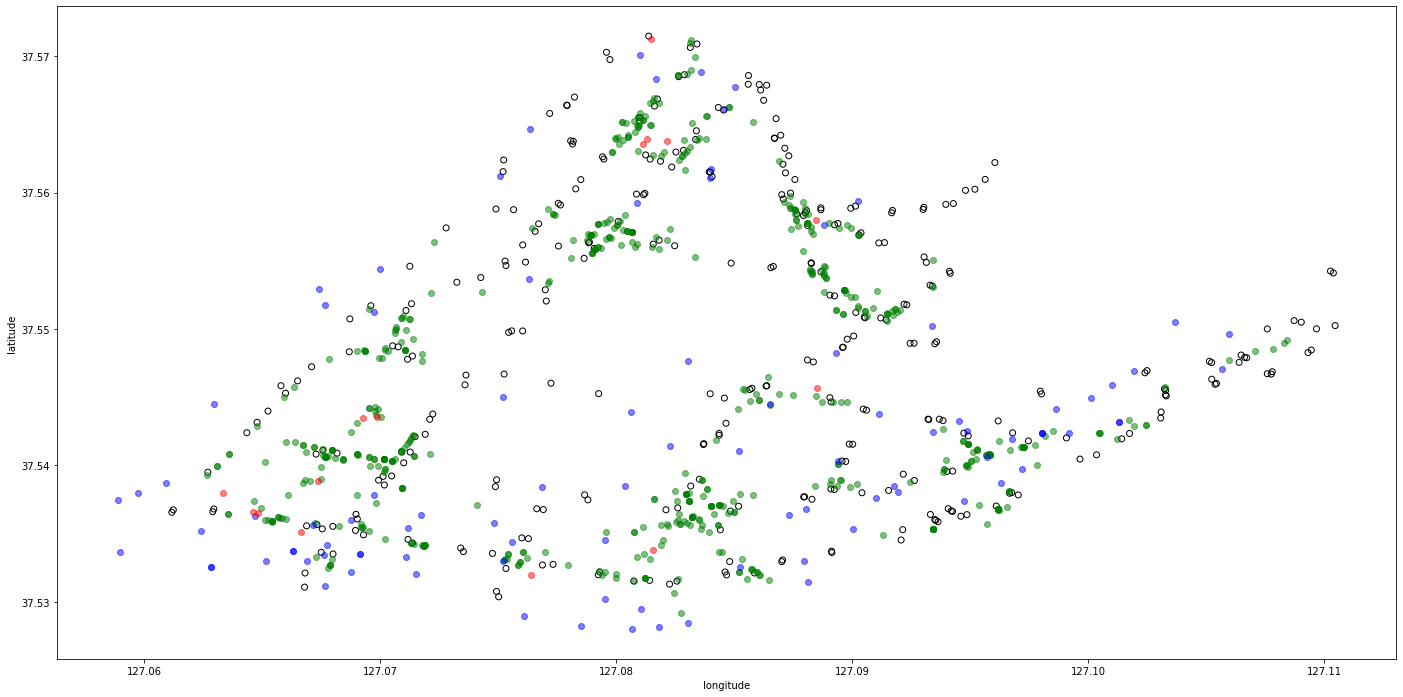

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(24,12)

ax.scatter(bus.X좌표, bus.Y좌표, color="black",facecolor="none")
ax.scatter(hospital.병원경도, hospital.병원위도, color="green", alpha=0.5)
ax.scatter(center.X좌표, center.Y좌표, color="blue", alpha=0.5)
ax.scatter(market.경도, market.위도, color="red", alpha=0.5)


plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()